### Notebooks imports and packages

In [103]:
import matplotlib.pyplot as plt
import pandas
import numpy as np 

%matplotlib inline

# Example 1 - Simple cost function

$f(x) = x^2+x+1$

In [104]:
def f(x):
    return x**2+x+1

In [105]:
#make data
x_1 = np.linspace(start = -3, stop = 3, num= 100)
print(x_1)

[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485  1.90909091  1.9

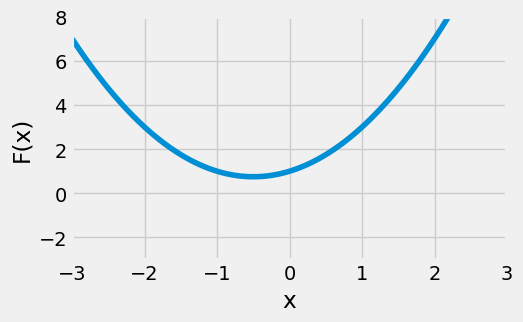

In [106]:
#plot
plt.figure(figsize=(5,3))
plt.plot(x_1,f(x_1))

plt.show
plt.xlabel('x')
plt.ylabel('F(x)')
plt.xlim(-3,3)
plt.ylim(-3,8)
plt.style.use('bmh')

# Slopes & Derivatives

$f(x)=2*x + 1 $


In [107]:
def df(x):
    return 2*x+1

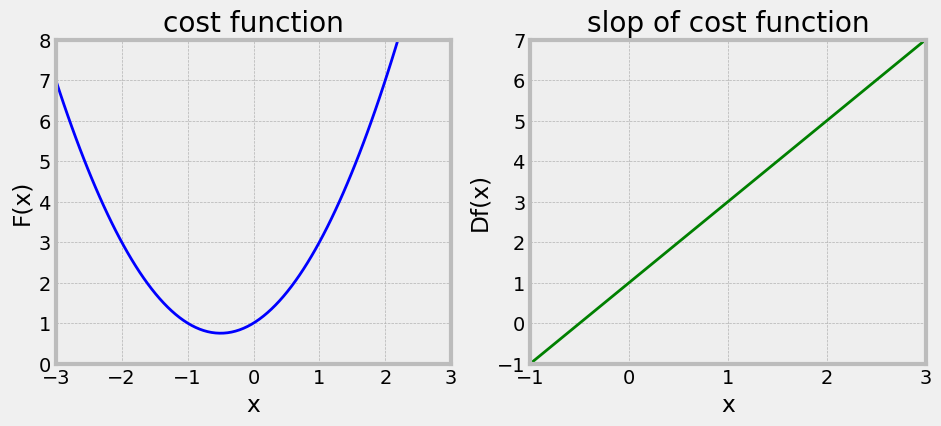

In [108]:
#ploting subplots
#plot 1
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x_1,f(x_1), color = 'blue',linewidth = 2)
plt.show
plt.title('cost function')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.xlim(-3,3)
plt.ylim(0,8)
plt.style.use('bmh')

#plot 2
plt.subplot(1,2,2)
plt.plot(x_1,df(x_1), color = 'green')
plt.show
plt.title('slop of cost function')
plt.xlim(-1,3)
plt.ylim(-1,7)
plt.xlabel('x')
plt.ylabel('Df(x)')
plt.style.use('fivethirtyeight')


## Gradient descent

In [109]:
new_x = 3
previous_x = 0
alpha = 0.1
presicion = 0.00000000000000001

x_list = [new_x]
slope_list = [df(new_x)]

for i in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - alpha * gradient

    step_size = abs(new_x - previous_x)
    x_list.append(new_x)
    slope_list.append(df(new_x))
    if step_size < presicion:
        print('number of loops', i)
        break


print('the local minimum occurs at', new_x)
print('the value of slope or df(x) at this point is', df(new_x))
print('the cost or f(X) value at this point is',f(new_x))
type(slope_list)


number of loops 169
the local minimum occurs at -0.4999999999999999
the value of slope or df(x) at this point is 2.220446049250313e-16
the cost or f(X) value at this point is 0.75


list

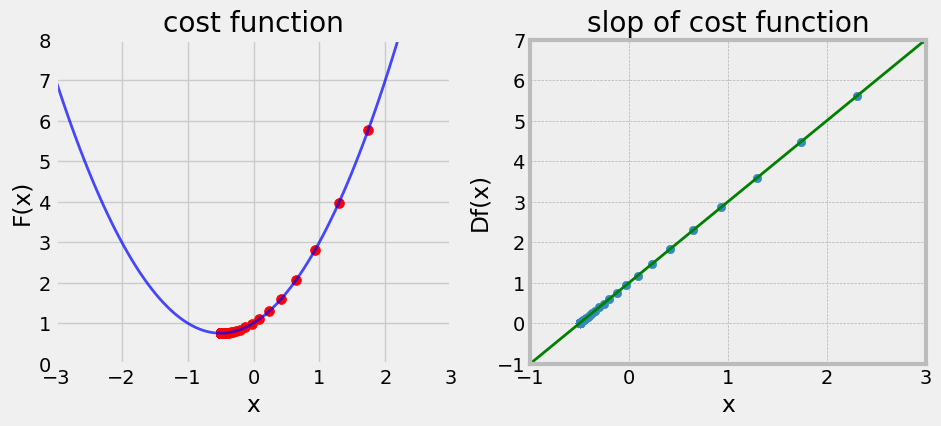

In [110]:
#ploting gradient descent 

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x_1,f(x_1), color = 'blue',linewidth = 2, alpha = 0.7)
values = np.array(x_list)
plt.scatter(x_list,f(values), color ='red',s = 50)
plt.show
plt.title('cost function')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.xlim(-3,3)
plt.ylim(0,8)
plt.style.use('bmh')


plt.subplot(1,2,2)
plt.plot(x_1,df(x_1), color = 'green')
plt.scatter(x_list,slope_list,)
plt.show
plt.title('slop of cost function')
plt.xlim(-1,3)
plt.ylim(-1,7)
plt.xlabel('x')
plt.ylabel('Df(x)')
plt.style.use('fivethirtyeight')


# Example -2: Multiple Minima vs Initial Guess & Advanced Functions
$$ g(x) = x^4-4x^2+5$$

In [111]:
x_2 = np.linspace(-2,2,1000)
def g(x):
    return x**4-4*x**2+5
def dg(x):
    return 4*x**3-8*x

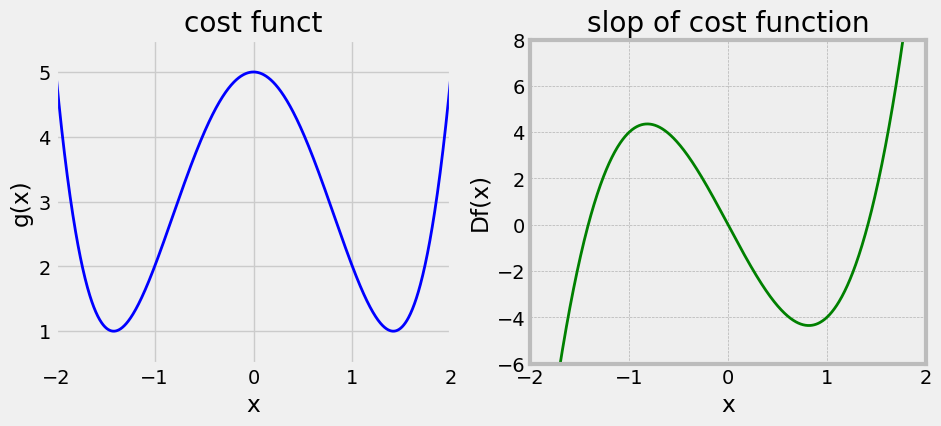

In [112]:
#ploting subplots
#plot 1
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x_2,g(x_2), color = 'blue',linewidth = 2)
plt.show
plt.title('cost funct')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.xlim(-2,2)
plt.ylim(0.5,5.5)
plt.style.use('bmh')

#plot 2
plt.subplot(1,2,2)
plt.plot(x_2,dg(x_2), color = 'green')
plt.show
plt.title('slop of cost function')
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.xlabel('x')
plt.ylabel('Df(x)')
plt.style.use('fivethirtyeight')


## Gradient descent as a python function

In [129]:
def gradient_descent(derivative_func,initial_guess, multiplier=0.02, precision=0.0001,max_iteration= 500):
    new_x = initial_guess
    previous_x = 0
    

    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for i in range(max_iteration):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))
        if step_size < presicion:
           
            break
    
    return new_x,x_list,slope_list


In [114]:
local_min,list_x,deriv_list = gradient_descent(dg, 0.5)
print("local min occurs at", local_min)
print("number of steps", len(list_x))


local min occurs at 1.4142135623730947
number of steps 100


In [115]:
local_min,list_x,deriv_list = gradient_descent(dg, -0.1)
print("local min occurs at", local_min)
print("number of steps", len(list_x))

local min occurs at -1.4142135623730947
number of steps 111


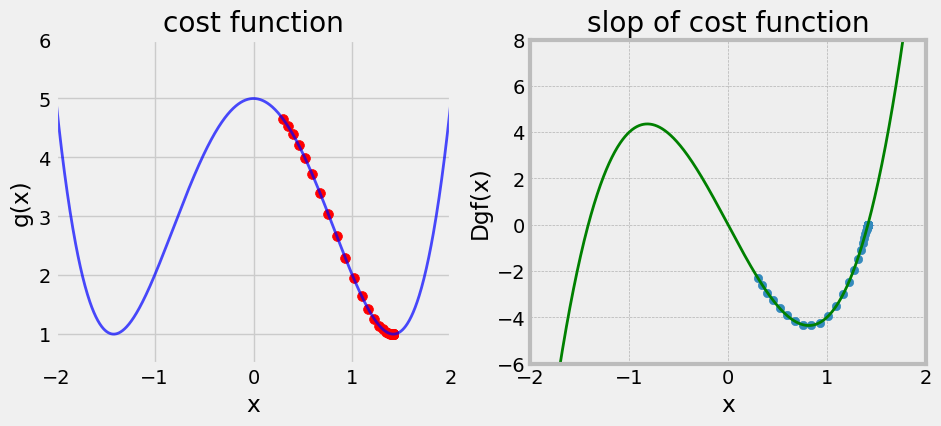

In [128]:
#ploting gradient descent 
local_min,list_x,deriv_list = gradient_descent(dg, 0.3)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x_2,g(x_2), color = 'blue',linewidth = 2, alpha = 0.7)

plt.scatter(list_x,g(np.array(list_x)), color ='red',s = 50)
 
plt.title('cost function')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.xlim(-2,2)
plt.ylim(0.5,6)
plt.style.use('bmh')


plt.subplot(1,2,2)
plt.plot(x_2,dg(x_2), color = 'green')
plt.scatter(list_x,deriv_list)

plt.title('slop of cost function')
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.xlabel('x')
plt.ylabel('Dgf(x)')
plt.style.use('fivethirtyeight')



# Example - 3
## $$ h(x) = x^5-2x^4+2 $$


In [117]:
x_3 = np.linspace(start= -2.5, stop= 2.5, num = 1000)

def h(x):
    return x**5 - 2*x**4 +2

def dh(x):
    return 5*x**4 - 8*x**3    

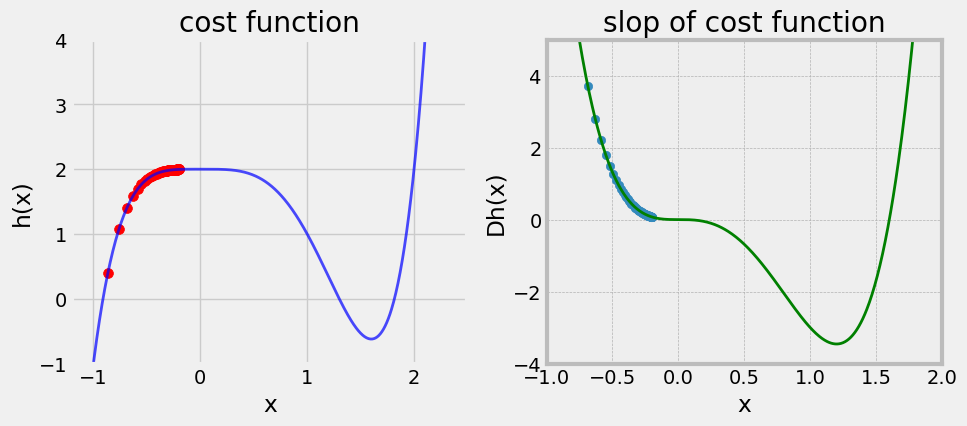

In [141]:
#ploting gradient descent 
local_min,list_x,deriv_list = gradient_descent(dh, -0.2, max_iteration=70)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x_3,h(x_3), color = 'blue',linewidth = 2, alpha = 0.7)

plt.scatter(list_x,h(np.array(list_x)), color ='red',s = 50)
 
plt.title('cost function')
plt.xlabel('x')
plt.ylabel('h(x)')
plt.xlim(-1.2,2.5)
plt.ylim(-1,4)
plt.style.use('bmh')


plt.subplot(1,2,2)
plt.plot(x_3,dh(x_3), color = 'green')
plt.scatter(list_x,deriv_list)

plt.title('slop of cost function')
plt.xlim(-1,2)
plt.ylim(-4,5)
plt.xlabel('x')
plt.ylabel('Dh(x)')
plt.style.use('fivethirtyeight')



In [142]:
local_min,list_x,deriv_list = gradient_descent(dh, -0.2, max_iteration=70)
print("local min occurs at", local_min)
print("the cost at that point is", h(local_min))
print("number of steps", len(list_x))


local min occurs at -2071072.4470816324
the cost at that point is -3.810455326061589e+31
number of steps 71
